In [4]:
#NAIVE BAYES CLASSIFICATION
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
#All libraries imported
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.manifold import TSNE

In [2]:
data=pd.read_csv("digit-train.csv")
test_data=pd.read_csv("digit-test.csv")

In [6]:
#check data again
X=data.loc[:,'pixel0':]
y=data.loc[:,'label']

df_test=test_data.loc[:,'pixel0':]
df_label=test_data.loc[:,'label']

In [7]:
#Find if attributes are correlated to each other-
corr_matrix = X.corr()

<AxesSubplot: >

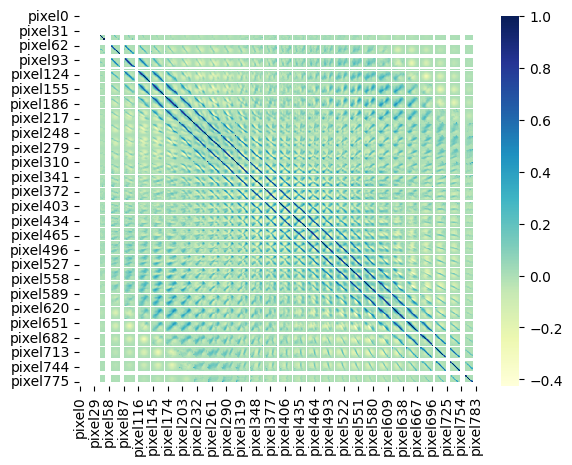

In [8]:
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [5]:
#check data again
X=data.loc[:,'pixel0':]
y=data.loc[:,'label']

df_test=test_data.loc[:,'pixel0':]
df_label=test_data.loc[:,'label']

In [9]:
#standard scaling
scaler=StandardScaler()
scaler.fit(X)
X_fit=scaler.transform(X)

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_fit)

In [10]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)

In [11]:
#Running Gaussian NB-
model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [52]:
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred,average="macro"))

accuracy: 0.7866666666666666
F1 score: 0.7855150601114544


In [53]:
param_grid = {'var_smoothing': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5,
                          return_train_score=True, scoring="accuracy")

grid_search.fit(X_train, y_train)

Parameter grid:
{'var_smoothing': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                           0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='accuracy')

In [54]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'var_smoothing': 0.001}
Best cross-validation score: 0.79


In [55]:
nb = GaussianNB(**grid_search.best_params_)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred,average="macro"))
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

accuracy: 0.7866666666666666
F1 score: 0.7856796602483677
Precision: 0.7898445567895473
Recall: 0.7871341250374784
F1-score: 0.7856796602483677


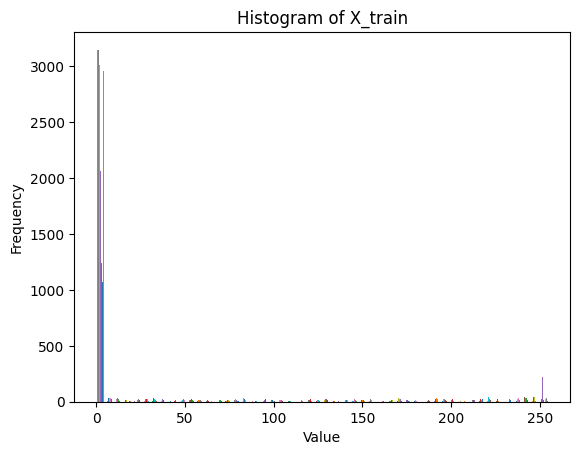

In [19]:
plt.hist(X_train, bins=50)
plt.title('Histogram of X_train')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#cross validation score
clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

In [ ]:
#predict the test data without cv
y_pred = clf.predict(df_tsne)

accuracy = accuracy_score(df_label, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(df_label, y_pred, average='macro')
recall = recall_score(df_label, y_pred, average='macro')
f1 = f1_score(df_label, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

In [38]:
#naive bayes without any pca or tsne
#check data again
X=data.loc[:,'pixel0':]
y=data.loc[:,'label']

df_test=test_data.loc[:,'pixel0':]
df_label=test_data.loc[:,'label']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#cross validation score
clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Cross-validation scores: [0.57301587 0.54126984 0.56190476 0.54372019 0.55166932]
Accuracy: 0.52
Precision: 0.6123900026715412
Recall: 0.5332674812843362
F1-score: 0.48358914397342845


In [ ]:
#predict test data

y_pred = clf.predict(df_test)

accuracy = accuracy_score(df_label, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(df_label, y_pred, average='macro')
recall = recall_score(df_label, y_pred, average='macro')
f1 = f1_score(df_label, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

In [ ]:
#Multinomial NB-

In [33]:
#check data again
X=data.loc[:,'pixel0':]
y=data.loc[:,'label']

df_test=test_data.loc[:,'pixel0':]
df_label=test_data.loc[:,'label']
scaler=StandardScaler()
scaler.fit(X)
X_fit=scaler.transform(X)

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_fit)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [34]:
model = MultinomialNB()
model.fit(X_train,y_train)

y_train_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_test)

In [35]:
print("accuracy:", accuracy_score(y_test, y_train_pred))
print("F1 score:", f1_score(y_test, y_train_pred,average="macro"))

accuracy: 0.82
F1 score: 0.8191821082892229


In [28]:
#Fine tuning model using gridseaarchcv

param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5,
                          return_train_score=True, scoring="accuracy")

grid_search.fit(X_train, y_train)

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='accuracy')

In [29]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.83


In [30]:
nb = MultinomialNB(**grid_search.best_params_)
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.820952380952381
Precision: 0.8248134508750649
Recall: 0.8234065532364339
F1-score: 0.8202565920357567


In [39]:
#predicting test file

df_test=test_data.loc[:,'pixel0':]
df_label=test_data.loc[:,'label']

y_pred = nb.predict(df_test)

accuracy = accuracy_score(df_label, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(df_label, y_pred, average='macro')
recall = recall_score(df_label, y_pred, average='macro')
f1 = f1_score(df_label, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.8163411148165793
Precision: 0.8218571499445615
Recall: 0.8140019417641383
F1-score: 0.8147826153447578


In [41]:
from sklearn.metrics import classification_report
print(classification_report(df_label,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       414
           1       0.90      0.93      0.91       478
           2       0.87      0.84      0.85       420
           3       0.76      0.77      0.76       446
           4       0.78      0.71      0.74       404
           5       0.85      0.69      0.76       388
           6       0.91      0.91      0.91       404
           7       0.95      0.80      0.87       465
           8       0.66      0.76      0.71       393
           9       0.63      0.81      0.71       386

    accuracy                           0.82      4198
   macro avg       0.82      0.81      0.81      4198
weighted avg       0.83      0.82      0.82      4198



In [ ]:
#cross validation score
clf = MultinomialNB()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

In [9]:
#Trying bernoulli NB
#check data again
X=data.loc[:,'pixel0':]
y=data.loc[:,'label']

df_test=test_data.loc[:,'pixel0':]
df_label=test_data.loc[:,'label']
scaler=StandardScaler()
scaler.fit(X)
X_fit=scaler.transform(X)

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_fit)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
model = BernoulliNB()
model.fit(X_train,y_train)

y_train_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_test)

In [11]:
print("accuracy:", accuracy_score(y_test, y_train_pred))
print("F1 score:", f1_score(y_test, y_train_pred,average="macro"))

accuracy: 0.819047619047619
F1 score: 0.8165255027430147


In [12]:
#Fine tuning model using gridseaarchcv

param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(BernoulliNB(), param_grid, cv=5,
                          return_train_score=True, scoring="accuracy")

grid_search.fit(X_train, y_train)

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='accuracy')

In [13]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.84


In [14]:
nb = BernoulliNB(**grid_search.best_params_)
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.8333333333333334
Precision: 0.8339415689972203
Recall: 0.8344993055107042
F1-score: 0.8311067583647265


In [15]:
#Learning curves
X=data.loc[:,'pixel0':]
y=data.loc[:,'label']

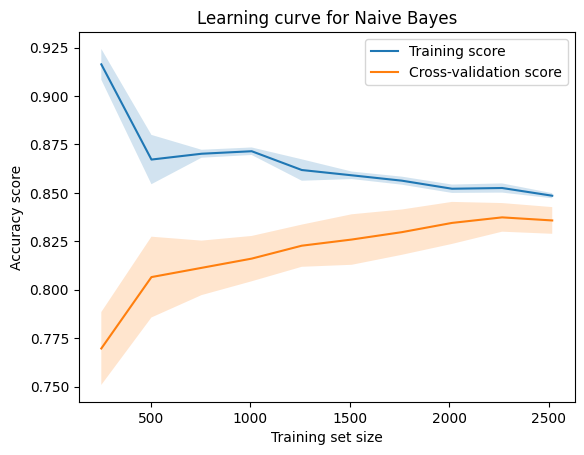

In [17]:

from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    nb, X_train, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Add labels and legend to plot
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.title('Learning curve for Naive Bayes')
plt.legend(loc='best')

plt.show()